In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions
import datatable as dt
import datetime

In [89]:
df_locations = pd.read_csv('Data/instagram_locations.csv',sep='\t')
#df_posts = pd.read_csv('Data/instagram_posts.csv',sep='\t')
df_profiles = pd.read_csv('Data/instagram_profiles.csv',sep='\t')
df_posts = pd.read_csv('Data/instagram_posts.csv',sep='\t', iterator=True)
df_posts.get_chunk(100)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0
...,...,...,...,...,...,...,...,...,...,...
95,28371027,-1,ByDrXj_gTxY,574033685,571655810,2019-05-29 21:05:51.000,2,@gioliandassia #handpatSet #Diesislive,18,0
96,28371028,-1,ByCVWdpg0nm,10175333523,571655810,2019-05-29 08:31:00.000,1,"Offering fine dining, excellent views, world c...",20,1
97,28371029,-1,ByBTSKSoyxG,51742692,571655810,2019-05-28 22:53:42.000,1,Walking up to the crater of Vulcano island is ...,22,0
98,28371030,-1,ByBR4L1i9NM,4632353135,571655810,2019-05-28 22:45:04.000,2,"Although less known than the other islands, #v...",15,0


In [5]:
df_locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [41]:
df_profiles.head()


,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [44]:
df_profiles = df_profiles.dropna(subset = ['followers', 'following','url','n_posts']) 
df_profiles = df_profiles.drop(columns = ['description'])


In [45]:
df_profiles.head()

,sid,profile_id,profile_name,firstname_lastname,following,followers,n_posts,url,cts,is_business_account
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True


In [46]:
df_profiles.dtypes

sid                      int64
profile_id             float64
profile_name            object
firstname_lastname      object
following              float64
followers              float64
n_posts                float64
url                     object
cts                     object
is_business_account     object
dtype: object

In [47]:
df_profiles = df_profiles.rename(columns = {'profile_id':'Profile ID', 'profile_name':'Profile name','firstname_lastname':'Fullname','n_posts':'Number of posts','is_business_account':'Business Account'})

In [48]:
df_profiles.shape

(870274, 10)

In [49]:
duplicate_rows_df = df_profiles[df_profiles.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [50]:
df_profiles = df_profiles.drop_duplicates()

In [51]:
df_profiles.shape

(870274, 10)

In [52]:
print(df_profiles.isnull().sum())

sid                     0
Profile ID           1237
Profile name            0
Fullname            18313
following               0
followers               0
Number of posts         0
url                     0
cts                 57315
Business Account     2737
dtype: int64


In [54]:
df_profiles.head()

,sid,Profile ID,Profile name,Fullname,following,followers,Number of posts,url,cts,Business Account
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True


<AxesSubplot:xlabel='following'>

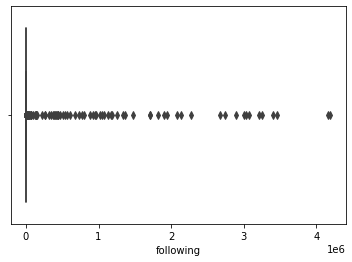

In [86]:
sns.boxplot(x=df_profiles['following'])

<AxesSubplot:xlabel='followers'>

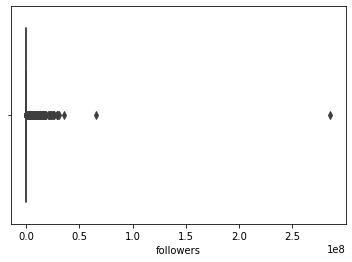

In [87]:
sns.boxplot(x=df_profiles['followers'])

<AxesSubplot:xlabel='Number of posts'>

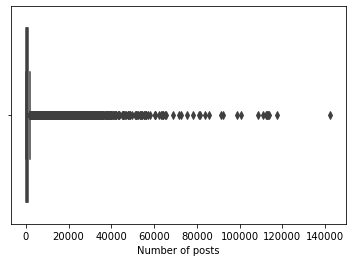

In [88]:
sns.boxplot(x=df_profiles['Number of posts'])

In [75]:
Q1 = df_profiles[['following','followers','Number of posts']].quantile(0.25)
Q3 = df_profiles[['following','followers','Number of posts']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

following          1492.0
followers          2258.0
Number of posts     677.0
dtype: float64


In [77]:
df_profiles.head()

,sid,Profile ID,Profile name,Fullname,following,followers,Number of posts,url,cts,Business Account
1,4184457,5.905830e+08,mama_haas,Deanna,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
6,4184471,2.061868e+09,masslivehs,MassLive High School Sports,157.0,4137.0,753.0,bit.ly/2HIysyv,2019-08-01 14:40:40.390 -0400,True
13,4184486,3.041392e+08,katepani413,kp!!!! ☆,1543.0,3008.0,115.0,vsco.co/kpani,2019-08-01 14:41:46.967 -0400,True
50,4184480,9.947274e+09,jk_vastgoed,JK VASTGOED,215.0,182.0,14.0,www.jkvastgoed.be,2019-08-01 14:41:25.930 -0400,True


,following,followers,Number of posts
following,1.00000,0.006910,0.020380
followers,0.00691,1.000000,0.061448
Number of posts,0.02038,0.061448,1.000000


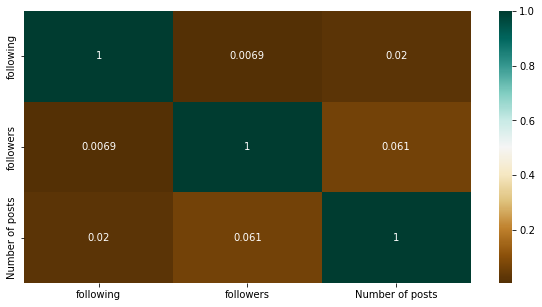

In [82]:
plt.figure(figsize=(10,5))
c= df_profiles[['following','followers','Number of posts']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

/var/folders/5b/bml_986d6rn1rxlht9v8rb4w0000gn/T/ipykernel_24667/3928458092.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_scatter = df_profiles[~((df_profiles < (Q1 - 1.5 * IQR)) |(df_profiles > (Q3 + 1.5 * IQR))).any(axis=1)]


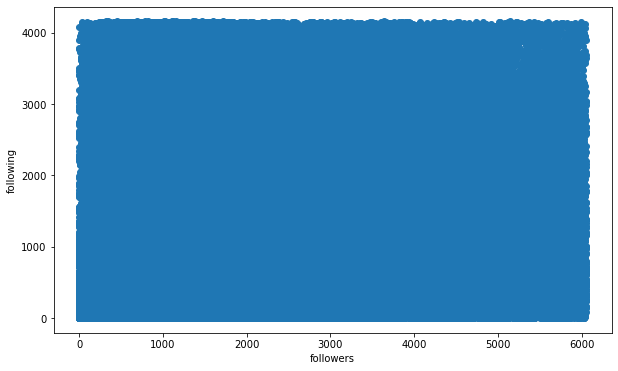

In [84]:
'''
#Adjusted the data for the scatter plot by removing outliers
df_scatter = df_profiles[~((df_profiles < (Q1 - 1.5 * IQR)) |(df_profiles > (Q3 + 1.5 * IQR))).any(axis=1)]


fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_scatter['followers'], df_scatter['following'])
ax.set_xlabel('followers')
ax.set_ylabel('following')
plt.show()
'''

Question 6

In [2]:
df = functions.time_intervals_df('Data/instagram_posts.csv','Data/instagram_profiles.csv',['sid_profile','cts','profile_id'])

<AxesSubplot:xlabel='avg_time_diff'>

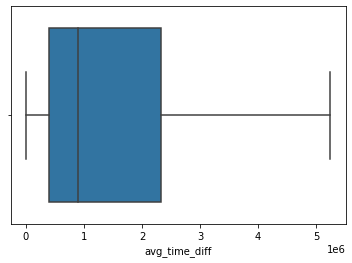

In [95]:
td_secs = df[['avg_time_diff']]/ np.timedelta64(1, 's')
td_secs.sort_values('avg_time_diff')
sns.boxplot(x=td_secs['avg_time_diff'],showfliers=False)

In [96]:
td_secs = td_secs[td_secs.avg_time_diff>0]

In [99]:
td_secs = td_secs.sort_values('avg_time_diff')

td_secs = td_secs.apply(np.log)
td_secs


,avg_time_diff
577472,NaN
1167642,NaN
410962,NaN
905148,NaN
973775,NaN
...,...
1907753,2.952357
318761,2.954510
212324,2.954927
1006287,2.956114


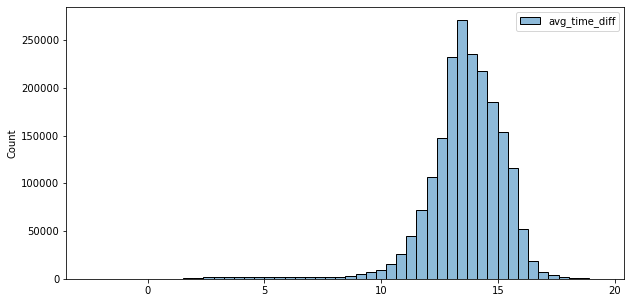

In [98]:
figure , axes = plt.subplots(figsize = (10,5))
sns.histplot (td_secs,bins=50)
plt.show()


In [66]:
df_sorted_by_count = df.sort_values('number_of_posts')
df_sorted_by_count.dtypes

sid                          int32
profile_id                 float64
following                  float64
followers                  float64
avg_time_diff      timedelta64[ns]
number_of_posts              int64
dtype: object

In [62]:
df_sorted_by_avg = df[df.number_of_posts>15].sort_values('avg_time_diff')
df_sorted_by_avg

,sid,profile_id,following,followers,avg_time_diff,number_of_posts
1713963,3634358,1.380267e+10,10.0,47.0,0 days 00:00:14.058823529,18
1543354,2642398,6.923714e+09,1494.0,631.0,0 days 00:00:14.352941176,18
463,4185216,2.004862e+09,232.0,1063.0,0 days 00:00:14.705882352,18
1632993,2456295,7.212411e+09,4759.0,525.0,0 days 00:00:34.166666666,19
1681187,3591179,5.717777e+09,89.0,143.0,0 days 00:00:35.850000,21
...,...,...,...,...,...,...
1813896,3790459,3.840390e+05,1945.0,11085.0,191 days 07:47:40.266666666,16
1009337,3311217,3.413958e+06,920.0,6940.0,191 days 20:22:56.800000,16
587773,3425123,3.908510e+05,802.0,320085.0,194 days 13:13:44.500000,17
177237,4467537,2.373680e+05,439.0,2360.0,196 days 20:03:32.062500,17


In [7]:
avgTime = df['avg_time_diff'].mean()

In [8]:
days=df['avg_time_diff'].mean().days

In [9]:
mins = avgTime - datetime.timedelta(days=days)

In [10]:
seconds = datetime.timedelta.total_seconds(mins)

In [11]:
totalMinutes = seconds/60

In [12]:
td = 'Days: '+ str(days) + ' and Minutes: '+ str (round(totalMinutes,2))

In [13]:
td

'Days: 24 and Minutes: 332.03'

In [53]:
df_sorted_by_count = df_sorted_by_count.reset_index()
topThree = df_sorted_by_count[['followers','following','number_of_posts','profile_id']].tail(3)
topThree=topThree.set_index('profile_id')

Text(0, 0.5, 'count')

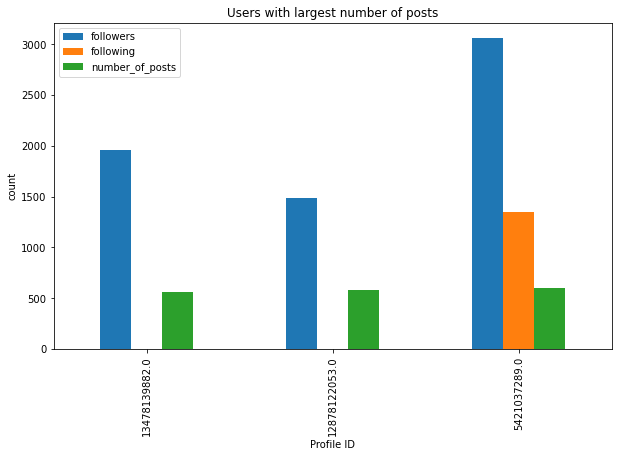

In [59]:
topThree.plot(kind="bar",figsize=(10,6))
plt.title("Users with largest number of posts")
plt.xlabel("Profile ID")
plt.ylabel("count")

How many time intervals?
7
06:00:00
10:59:59
11:00:00
13:59:59
14:00:00
16:59:59
17:00:00
19:59:59
20:00:00
23:59:59
00:00:00
02:59:59
03:00:00
05:59:59


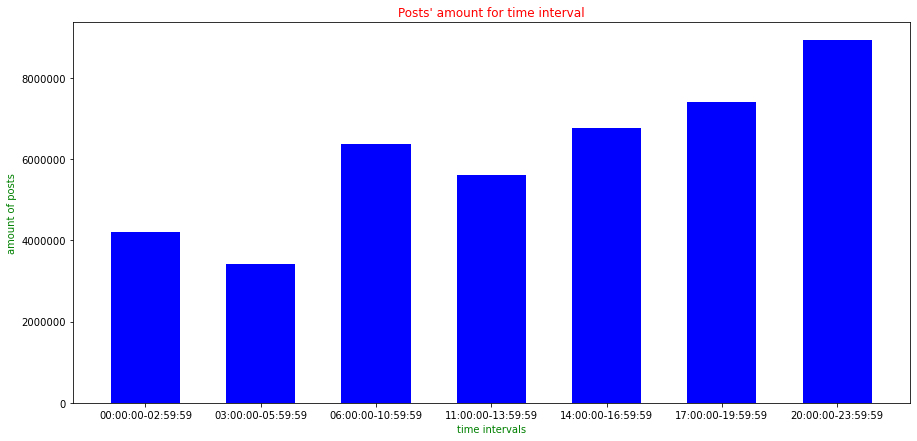

(None,
 [[datetime.time(6, 0), datetime.time(10, 59, 59)],
  [datetime.time(11, 0), datetime.time(13, 59, 59)],
  [datetime.time(14, 0), datetime.time(16, 59, 59)],
  [datetime.time(17, 0), datetime.time(19, 59, 59)],
  [datetime.time(20, 0), datetime.time(23, 59, 59)],
  [datetime.time(0, 0), datetime.time(2, 59, 59)],
  [datetime.time(3, 0), datetime.time(5, 59, 59)]])

In [3]:
functions.intervals('Data/instagram_posts.csv')

Question 6 part 2

How many time intervals?
7
06:00:00
10:59:59
11:00:00
13:59:59
14:00:00
16:59:59
17:00:00
19:59:59
20:00:00
23:59:59
00:00:00
02:59:59
03:00:00
05:59:59


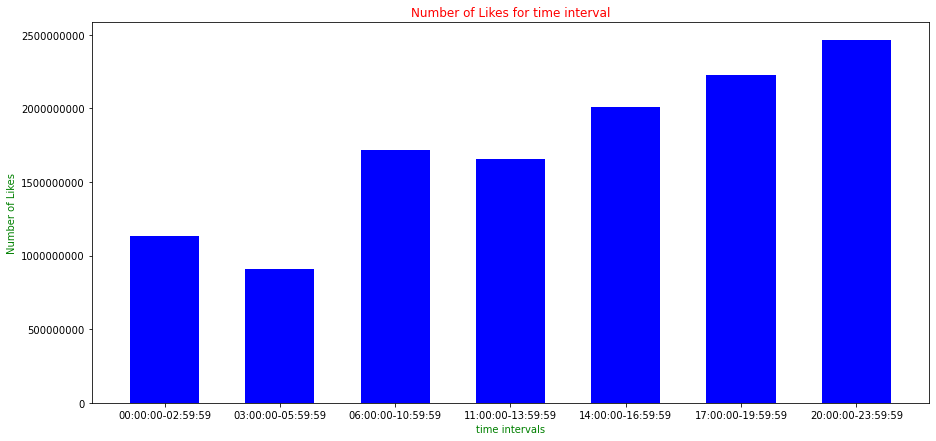

In [2]:
functions.intervals_1('Data/instagram_posts.csv','numbr_likes','Number of Likes',"Number of Likes for time interval")

How many time intervals?
7
06:00:00
10:59:59
11:00:00
13:59:59
14:00:00
16:59:59
17:00:00
19:59:59
20:00:00
23:59:59
00:00:00
02:59:59
03:00:00
05:59:59


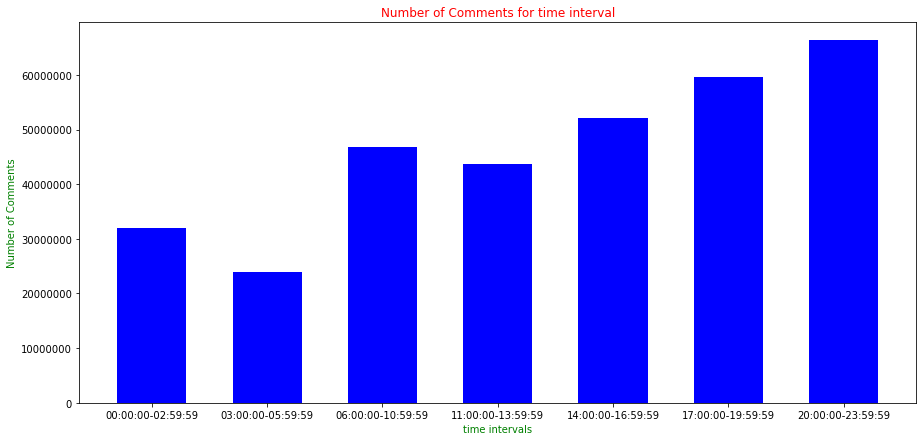

In [4]:
functions.intervals_1('Data/instagram_posts.csv','number_comments','Number of Comments',"Number of Comments for time interval")

Question 7 part 1

In [2]:
#Getting the dataframe ready
df_merge = functions.posts('Data/instagram_posts.csv','Data/instagram_profiles.csv',['numbr_likes','profile_id','sid_profile'],['sid','profile_id','followers'])

In [16]:
#Getting the posts where the number of likes exceeds 20% of the user's number of followers
df_prob = df_merge[df_merge.numbr_likes > (df_merge.followers)*0.2]

In [17]:
#calculating the probability by dividing the occurences of the likes condition by the total number of posts
prob = len(df_prob.index)/len(df_merge.index)

In [18]:
prob

0.15734185243494658

Question 7 part 2

In [22]:
#Creating the dataframe for the posts with locations
df_merge = functions.posts_df('Data/instagram_posts.csv','Data/instagram_profiles.csv',['profile_id','sid_profile','location_id'],['sid'])

In [23]:
#Creating the dataframe for the locations
df_locations = pd.read_csv('Data/instagram_locations.csv',sep='\t', usecols = ['name','id'])

In [24]:
#cleaning the locations dataframe
df_locations = df_locations.dropna()

In [25]:
#merging both datasets to remove any posts with invalid locations
df_merge_locations = pd.merge(df_merge,df_locations,left_on = 'location_id', right_on = 'id')


In [27]:
#Getting the number of times a user posted from a locations
df_gb = df_merge_locations.groupby( [ "name", "profile_id"] ).size().to_frame(name = 'visits').reset_index()
df_gb

,name,profile_id,visits
0,ElementaryTejon Elementary,2.388571e+09,1
1,High School560 City As School,2.273864e+08,1
2,High School560 City As School,2.274402e+08,1
3,High School560 City As School,3.820541e+08,1
4,High School560 City As School,4.307581e+09,1
...,...,...,...
7817752,𝙲𝙰𝚂𝙰 𝙱𝙻𝙰𝙽𝙲𝙰,6.021365e+08,1
7817753,𝙲𝙰𝚂𝙰 𝙱𝙻𝙰𝙽𝙲𝙰,1.088733e+09,2
7817754,𝙲𝙰𝚂𝙰 𝙱𝙻𝙰𝙽𝙲𝙰,7.440289e+09,1
7817755,𝟙𝟡.𝟙𝟡,4.222007e+09,8


In [11]:
#calculating the probability by dividing the places that were posted from by a user with all the posts
prob = len(df_gb[df_gb.visits>1].index)/len(df_gb.index)

In [12]:
prob

0.1935391442839679

In [6]:
dt_posts = dt.fread('Data/instagram_posts.csv')
df_posts = dt_posts[:,['cts','numbr_likes','number_comments']].to_pandas()
df_posts = df_posts.dropna()

In [7]:
df_posts

,cts,numbr_likes,number_comments
0,2017-08-06 20:06:57,80.0,0.0
1,2017-06-19 09:31:16,25.0,1.0
2,2017-03-11 20:05:03,9.0,0.0
3,2016-09-13 16:27:16,4.0,0.0
4,2015-10-18 10:19:27,8.0,0.0
...,...,...,...
42710192,2017-12-13 15:38:04,74.0,0.0
42710193,2017-10-31 11:28:01,49.0,0.0
42710194,2017-01-13 20:16:37,18.0,0.0
42710195,2019-05-20 20:07:52,27.0,1.0


KeyboardInterrupt: 